In [5]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file.
file_path = ("C:\\Users\\ASUS\\OneDrive\\Desktop\\dataset yt comment exam.xlsx")

# Read the Excel file into a pandas DataFrame.
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to verify the import.
print(df.head(5))

                  author  authorIsChannelOwner                         cid  \
0  @katlynnstevenson5653                 False  UgymzlA6wnCV2YJQZT94AaABAg   
1               @Kperez1                 False  UgwDR5fiNgN5BwJGig54AaABAg   
2            @trevor4136                 False  UgwULq8jZ9Bm_FO14bZ4AaABAg   
3               @bbprtsf                 False  UgzhYn8JTlgxdniZv7F4AaABAg   
4  @cristinahudspeth5829                 False  Ugwc9-FxDRj-mh9VvwR4AaABAg   

                                             comment  commentsCount  \
0  The United States is one of the only wealthy n...           1517   
1  Nah.... watching this almost through 2025 is s...           1517   
2  only way to accomplish this is to kill 80% of ...           1517   
3  As long as Capitalist is the norm, some SDG is...           1517   
4  A decade has passed, and the world is in a wor...           1517   

   hasCreatorHeart                                      pageUrl  \
0            False  https://www.youtu

In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Run these lines once to download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your dataframe and 'text' is the colomn you're working with

# 1. Remove missing rows
df_processed = df.dropna(subset=['comment']).copy()

# 2. Tokenize it
df_processed['comment_tokenized'] = df_processed['comment'].apply(lambda x: word_tokenize(str(x)))

# 3. Make every text lowercase
df_processed['comment_lower'] = df_processed['comment'].str.lower()

# 4. Remove special characters
df_processed['comment_no_special_chars'] = df_processed['comment_lower'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', x))

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df_processed['comment_tokenized_no_special'] = df_processed['comment_no_special_chars'].apply(lambda x: word_tokenize(x))
df_processed['comment_no_stopwords'] = df_processed['comment_tokenized_no_special'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the head of the DataFrame with the new columns
print(df_processed[['comment', 'comment_tokenized', 'comment_lower', 'comment_no_special_chars', 'comment_no_stopwords']].head())
print(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             comment  \
0  The United States is one of the only wealthy n...   
1  Nah.... watching this almost through 2025 is s...   
2  only way to accomplish this is to kill 80% of ...   
3  As long as Capitalist is the norm, some SDG is...   
4  A decade has passed, and the world is in a wor...   

                                   comment_tokenized  \
0  [The, United, States, is, one, of, the, only, ...   
1  [Nah, ...., watching, this, almost, through, 2...   
2  [only, way, to, accomplish, this, is, to, kill...   
3  [As, long, as, Capitalist, is, the, norm, ,, s...   
4  [A, decade, has, passed, ,, and, the, world, i...   

                                       comment_lower  \
0  the united states is one of the only wealthy n...   
1  nah.... watching this almost through 2025 is s...   
2  only way to accomplish this is to kill 80% of ...   
3  as long as capitalist is the norm, some sdg is...   
4  a decade has passed, and the world is in a 

In [7]:
# Define the name for the new Excel file
output_file_path = 'Genexam.xlsx'

# Save the processed DataFrame to a new Excel file.
# index=False ensures that the pandas index is not saved as a separate column.
df_processed.to_excel(output_file_path, index=False)

print(f"Successfully saved the updated DataFrame to {output_file_path}")

Successfully saved the updated DataFrame to Genexam.xlsx


In [8]:
from textblob import TextBlob

# Load the preprocessed Excel file we created earlier.
preprocessed_file_path = 'Genexam.xlsx'
df_final = pd.read_excel(preprocessed_file_path)

# --- Step 1: Re-join the tokenized words into a single string ---
# TextBlob works on strings, but our 'text_no_stopwords' column contains lists of words.
# We need to convert it back to a string first.
# The eval() function is used here because pandas sometimes reads lists as strings.
df_final['comment_for_sentiment'] = df_final['comment_no_stopwords'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))


# --- Step 2: Define functions to get sentiment polarity and category ---

# Function to calculate polarity
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Function to categorize the polarity
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# --- Step 3: Apply the functions to create new columns ---
# Create 'sentiment_score' column
df_final['sentiment_score'] = df_final['comment_for_sentiment'].apply(get_sentiment_score)

# Create 'sentiment_category' column
df_final['sentiment_category'] = df_final['sentiment_score'].apply(get_sentiment_category)


# --- Step 4: Save the final DataFrame to a new Excel file ---
# We will drop the temporary column used for the analysis.
final_output_file = 'Genexamresult.xlsx'
df_final.drop(columns=['comment_for_sentiment'], inplace=True)
df_final.to_excel(final_output_file, index=False)

print(f"Successfully performed sentiment analysis and saved the results to {final_output_file}")

# Display the head of the final DataFrame to show the new columns
print(df_final[['comment', 'comment_no_stopwords', 'sentiment_score', 'sentiment_category']].head())

Successfully performed sentiment analysis and saved the results to Genexamresult.xlsx
                                             comment  \
0  The United States is one of the only wealthy n...   
1  Nah.... watching this almost through 2025 is s...   
2  only way to accomplish this is to kill 80% of ...   
3  As long as Capitalist is the norm, some SDG is...   
4  A decade has passed, and the world is in a wor...   

                                comment_no_stopwords  sentiment_score  \
0  ['united', 'states', 'one', 'wealthy', 'nation...            0.580   
1  ['nah', 'watching', 'almost', '2025', 'sad', '...           -0.250   
2  ['way', 'accomplish', 'kill', '80', 'population']            0.000   
3  ['long', 'capitalist', 'norm', 'sdg', 'possible']           -0.025   
4    ['decade', 'passed', 'world', 'worse', 'state']           -0.400   

  sentiment_category  
0           Positive  
1           Negative  
2            Neutral  
3           Negative  
4           Negative  


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Load the Excel file with the preprocessed text
file_path = 'Genexamresult.xlsx'
df_topics = pd.read_excel(file_path)

# --- Step 1: Prepare the text data for vectorization ---
# The 'title_no_stopwords' column contains lists of words. We need to join them into a single string per row.
# The eval() function handles cases where the list was saved as a string like '["word1", "word2"]'.
df_topics['cleaned_comment_joined'] = df_topics['comment_no_stopwords'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

# Drop rows that might be empty after all the cleaning
df_topics.dropna(subset=['cleaned_comment_joined'], inplace=True)


# --- Step 2: Vectorize the text using TF-IDF ---
# TF-IDF converts text into a matrix of numerical features, which is required for NMF.
# We are filtering out terms that are too frequent (in >95% of docs) or too rare (in <2 docs).
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_topics['cleaned_comment_joined'])


# --- Step 3: Apply NMF to find 5 topics ---
num_topics = 5
# random_state is set for reproducibility of the results
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)


# --- Step 4: Display the topics with their top words ---
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        # Print the topic number and the top words
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print("-" * 50)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10  # You can change this number to see more or fewer words per topic

print("Top words for each of the 5 topics:")
display_topics(nmf_model, feature_names, num_top_words)

Top words for each of the 5 topics:
Topic #1:
paris abrahamic accords agreement macron france emmanuel bank 2023 10
--------------------------------------------------
Topic #2:
better world place make 2030 order new agenda humans excellent
--------------------------------------------------
Topic #3:
thank sir informative presentation useful lecture video tedx excellent words
--------------------------------------------------
Topic #4:
people goals global dont video poverty world think like social
--------------------------------------------------
Topic #5:
talk nice excellent interesting ted good amazing information informative sir
--------------------------------------------------


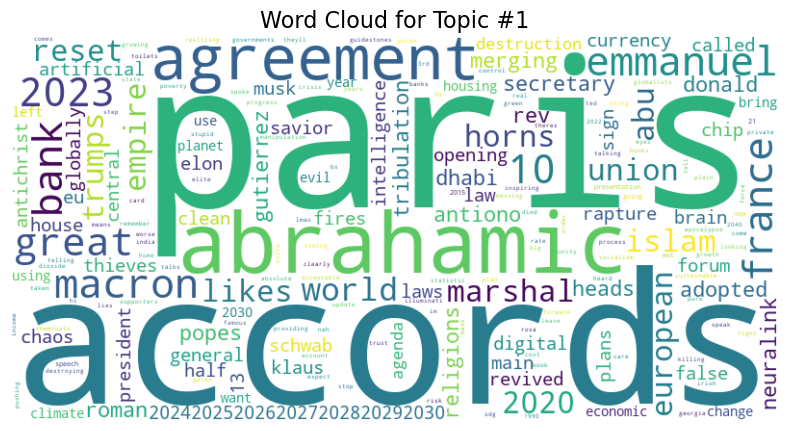

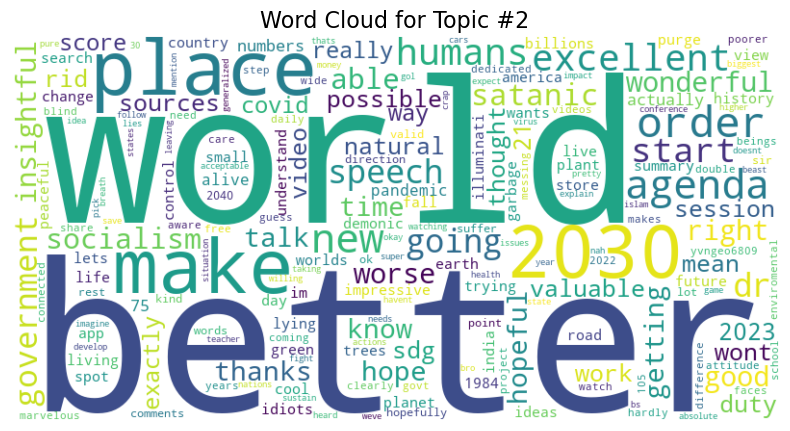

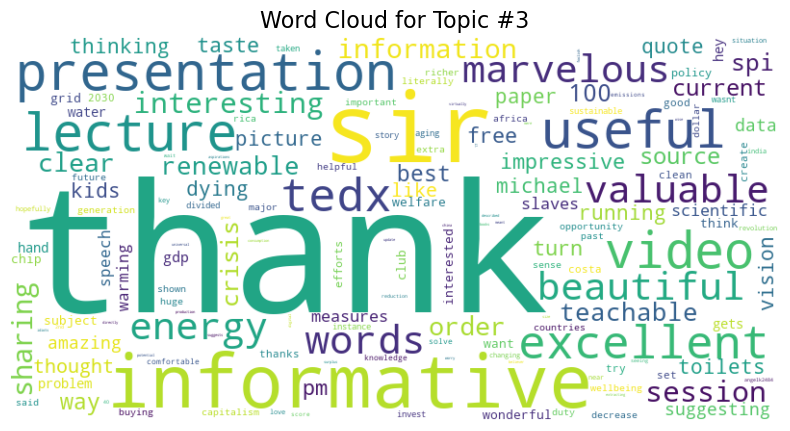

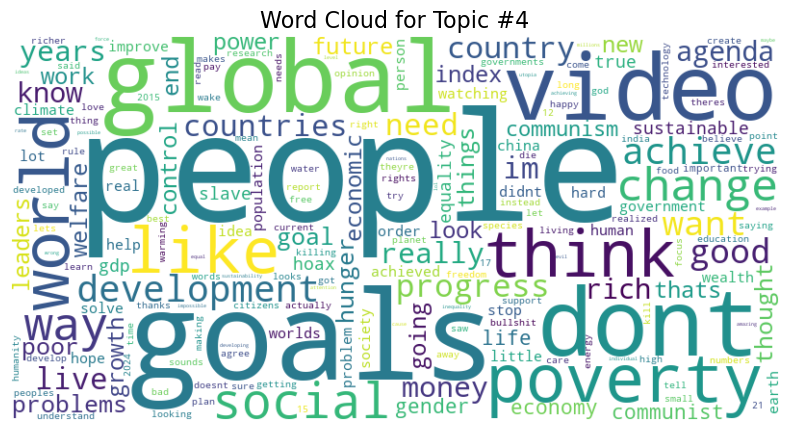

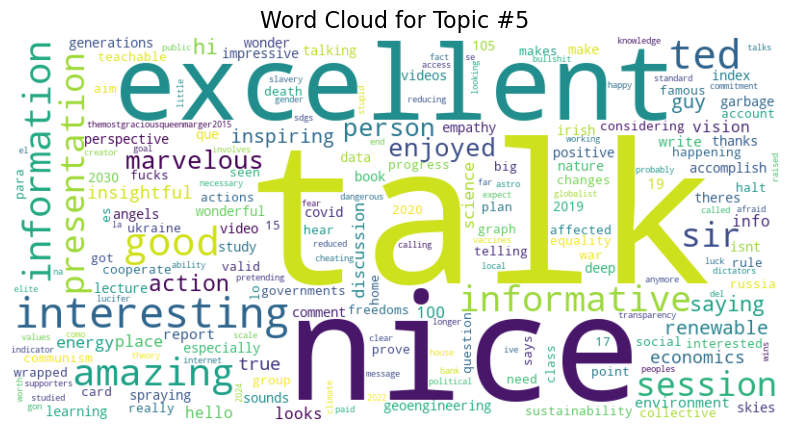

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# --- Part 1: Re-run the NMF model to ensure variables are loaded ---
# (This is the same as the previous step, ensuring the code can run standalone)

# Load the data
file_path = 'Genexamresult.xlsx'
df_topics = pd.read_excel(file_path)

# Prepare text
df_topics['cleaned_comment_joined'] = df_topics['comment_no_stopwords'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
df_topics.dropna(subset=['cleaned_comment_joined'], inplace=True)

# Vectorize
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_topics['cleaned_comment_joined'])

# Apply NMF
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# --- Part 2: Generate a word cloud for each topic ---

# Loop through each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    
    # --- Create a dictionary of words and their weights for the current topic ---
    # The WordCloud object works best with a dictionary of frequencies (or weights).
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}
    
    # --- Create the WordCloud object ---
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate_from_frequencies(topic_words)
    
    # --- Plot the WordCloud image ---
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16)
    plt.axis('off') # Hide the axes
    plt.show()

In [14]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from collections import Counter
import ast # To safely evaluate string representations of lists

# Load the Excel file with the preprocessed text
file_path = 'Genexamresult.xlsx'
df_ngrams = pd.read_excel(file_path)

# --- Step 1: Create a single list of all words from the 'text_no_stopwords' column ---

# The column might contain string representations of lists, so we use ast.literal_eval for safe conversion.
# We then flatten the list of lists into a single list of words.
all_words = [word for sublist in df_ngrams['comment_no_stopwords'].apply(ast.literal_eval) for word in sublist]


# --- Step 2: Calculate Bigram Frequencies ---

# Create bigrams
bigrams = list(nltk.bigrams(all_words))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

print("--- Top 20 Most Common Bigrams ---")
# .most_common(20) returns a list of (bigram, count) tuples
for bigram, count in bigram_counts.most_common(20):
    print(f"{' '.join(bigram)}: {count}")


# --- Step 3: Calculate Trigram Frequencies ---

# Create trigrams
trigrams = list(nltk.trigrams(all_words))

# Count the frequency of each trigram
trigram_counts = Counter(trigrams)

print("\n--- Top 20 Most Common Trigrams ---")
# .most_common(20) returns a list of (trigram, count) tuples
for trigram, count in trigram_counts.most_common(20):
    print(f"{' '.join(trigram)}: {count}")

--- Top 20 Most Common Bigrams ---
emmanuel macron: 54
paris agreement: 54
abrahamic accords: 54
agenda 2030: 45
climate change: 44
better place: 39
world better: 34
global goals: 32
world bank: 29
un agenda: 29
world economic: 29
economic forum: 29
klaus schwab: 28
make world: 28
elon musk: 28
artificial intelligence: 28
antichrist revived: 27
revived roman: 27
roman empire: 27
empire rev: 27

--- Top 20 Most Common Trigrams ---
world better place: 30
world economic forum: 29
un agenda 2030: 28
make world better: 27
antichrist revived roman: 27
revived roman empire: 27
roman empire rev: 27
empire rev 13: 27
rev 13 10: 27
13 10 heads: 27
10 heads 7: 27
heads 7 horns: 27
7 horns european: 27
horns european union: 27
european union emmanuel: 27
union emmanuel macron: 27
emmanuel macron france: 27
macron france president: 27
france president savior: 27
president savior clean: 27
